In [ ]:
pip install well_profile

Importing Essential Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import missingno as msno
import well_profile as wp
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

Uploading Data to the Colaboratory Notebook

In [ ]:
print("Select all the Well given data files (only csv format)")
from google.colab import files
uploaded = files.upload()

Select all the Well given data files (only csv format)


Saving Global Data ML.csv to Global Data ML.csv
Saving Well 1 Drilling Parameters.csv to Well 1 Drilling Parameters.csv
Saving Well 1 Drilling Parameters_ML.csv to Well 1 Drilling Parameters_ML.csv
Saving Well 1 Planned Data.csv to Well 1 Planned Data.csv
Saving Well 1 PPFG.csv to Well 1 PPFG.csv
Saving Well 1 Survey.csv to Well 1 Survey.csv
Saving Well 2 Drilling Parameters.csv to Well 2 Drilling Parameters.csv
Saving Well 2 Drilling Parameters_ML.csv to Well 2 Drilling Parameters_ML.csv
Saving Well 2 Planned Data.csv to Well 2 Planned Data.csv
Saving Well 2 PPFG.csv to Well 2 PPFG.csv
Saving Well 2 Survey.csv to Well 2 Survey.csv
Saving Well 3 Drilling Parameters.csv to Well 3 Drilling Parameters.csv
Saving Well 3 Drilling Parameters_ML.csv to Well 3 Drilling Parameters_ML.csv
Saving Well 3 Planned Data.csv to Well 3 Planned Data.csv
Saving Well 3 PPFG.csv to Well 3 PPFG.csv
Saving Well 3 Survey.csv to Well 3 Survey.csv
Saving well_1_survey.xlsx to well_1_survey.xlsx
Saving well_2_su

Creating Dataframes from the comma-seperated value files

In [ ]:
print("Importing Well Drilling Parameters")
Well_1_dP = pd.read_csv("Well 1 Drilling Parameters.csv")
print("Importing Well Planning Data")
Well_1_planD = pd.read_csv("Well 1 Planned Data.csv")
print("Importing Well Pore Pressure Fracture Gradient")
Well_1_PPFG = pd.read_csv("Well 1 PPFG.csv")
print("Importing Well Survey Data")
Well_1_Sur = pd.read_csv("Well 1 Survey.csv")

Importing Well Drilling Parameters
Importing Well Planning Data
Importing Well Pore Pressure Fracture Gradient
Importing Well Survey Data


In [ ]:
del Well_1_PPFG['Unnamed: 0'] #Cleaning Data 
Well_1_PPFG.head(10)

,Depth (m),Pore Pressure (psi),Fracture Pressure (psi),EMW (ppg)
0,980,1613.379,1747.131,10.00
1,1030,1713.267,1841.542,10.05
2,1080,1820.387,1934.622,10.15
3,1130,1918.159,2033.827,10.20
4,1180,2033.230,2133.885,10.30
5,1230,2129.876,2245.288,10.45
6,1280,2231.742,2347.478,10.55
7,1330,2325.726,2450.521,10.65
8,1380,2424.931,2547.355,10.73
9,1430,2537.187,2646.969,10.84


Checking fot the missing values

Searching for Missing Values


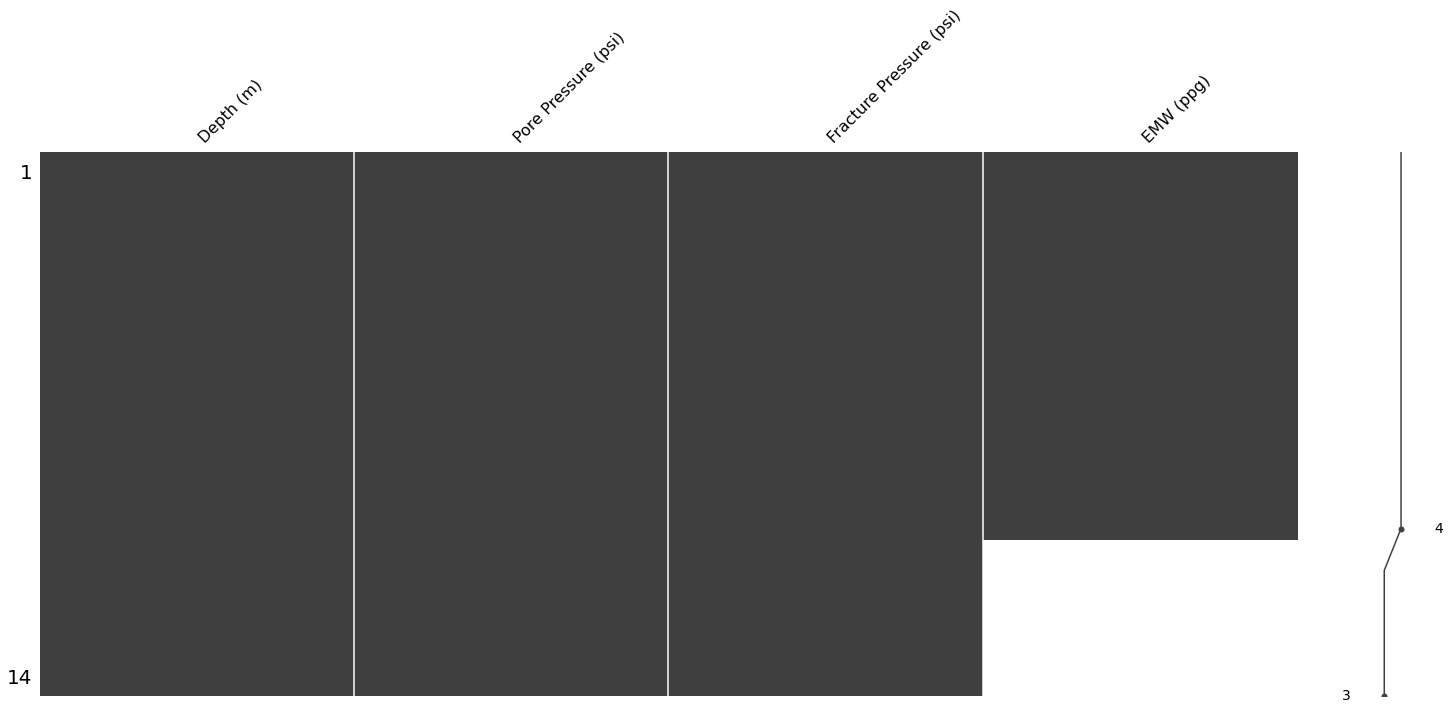

In [ ]:
print("Searching for Missing Values")
msno.matrix(Well_1_PPFG)

Extracting features from the Pore Pressure Fracture Gradient data provided

In [ ]:
Depth_1PPFGm = Well_1_PPFG['Depth (m)']
Depth_1PPFGft = Depth_1PPFGm*3.280839895  # Coverting the depth from metre to feet
Well_1_PPFG["Depth (ft)"]=Depth_1PPFGft
Well_1_PPFG.head(10)

,Depth (m),Pore Pressure (psi),Fracture Pressure (psi),EMW (ppg),Depth (ft)
0,980,1613.379,1747.131,10.00,3215.223097
1,1030,1713.267,1841.542,10.05,3379.265092
2,1080,1820.387,1934.622,10.15,3543.307087
3,1130,1918.159,2033.827,10.20,3707.349081
4,1180,2033.230,2133.885,10.30,3871.391076
5,1230,2129.876,2245.288,10.45,4035.433071
6,1280,2231.742,2347.478,10.55,4199.475066
7,1330,2325.726,2450.521,10.65,4363.517060
8,1380,2424.931,2547.355,10.73,4527.559055
9,1430,2537.187,2646.969,10.84,4691.601050


Statistical Description of the Well_1_PPFG data frame

In [ ]:
Well_1_PPFG.describe()

,Depth (m),Pore Pressure (psi),Fracture Pressure (psi),EMW (ppg),Depth (ft)
count,14.000000,14.000000,14.000000,10.000000,14.000000
mean,1305.000000,2283.776643,2403.621000,10.392000,4281.496063
std,209.165007,434.334996,435.652836,0.295214,686.236898
min,980.000000,1613.379000,1747.131000,10.000000,3215.223097
25%,1142.500000,1946.926750,2058.841500,10.162500,3748.359580
50%,1305.000000,2278.734000,2398.999500,10.375000,4281.496063
75%,1467.500000,2613.189750,2725.851000,10.625000,4814.632546
max,1630.000000,2975.463000,3106.695000,10.840000,5347.769029


In [ ]:
PoreP_1ppg = Well_1_PPFG["Pore Pressure (psi)"]/(0.052*Well_1_PPFG['Depth (ft)'])
PoreP_1ppg.head(10)    

0     9.649881
1     9.749884
2     9.879878
3     9.949879
4    10.099878
5    10.149878
6    10.219876
7    10.249874
8    10.299874
9    10.399874
dtype: float64

In [ ]:
FracP_1ppg =  Well_1_PPFG["Fracture Pressure (psi)"]/(0.052*Well_1_PPFG['Depth (ft)'])
FracP_1ppg.head(10)

0    10.449873
1    10.479873
2    10.499872
3    10.549872
4    10.599872
5    10.699872
6    10.749869
7    10.799867
8    10.819869
9    10.849868
dtype: float64

Plotting Equivalent Mud Window


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=PoreP_1ppg,
    y=Depth_1PPFGm,
    name="Pore Pressure (ppg)"      
))

fig.add_trace(go.Scatter(
    x=FracP_1ppg,
    y=Depth_1PPFGm,
    name="Fracture Pressure (ppg)",
))
fig.add_trace(go.Scatter(
    x=Well_1_PPFG['EMW (ppg)'],
    y=Depth_1PPFGm,
    name="Equivalent Mud Weight (ppg)",
))

fig['layout']['yaxis']['autorange'] = "reversed"
fig.update_layout(
    autosize=False,
    width=600,
    height=800,
    
)
fig.update_xaxes(title_text="Pressure Gradient (ppg)",showgrid = False,title_font_family="Times New Roman" )
fig.update_yaxes(title_text="Depth (m)", showgrid = False,title_font_family="Times New Roman")
fig.update_layout(title_text = "Mud Window of well 1",title_font_family = "Times New Roman",title_font_color = "Black")
fig.show()

Analysing Well Plan Data

In [ ]:
del Well_1_planD['Unnamed: 0']
Well_1_planD.head()

,"Section ("")",Top (m),Bottom (m),MW Min (ppg),MW.1 Max(ppg),Flow In,Flow In.1 Max. (GPM)
0,12.25,1440,2300,10.35,11.1,250,550


In the mud window graph of well 1 we can observe the values of the Drilling Mud gradient is following the planed value range.

Analysing the Drilling Parameter Data

In [ ]:
Well_1_dP.head(80)

,Depth (m),Hole Depth (m),Block Ht. (m),ROP (m/hr),RPM (rpm),WOB Avg (klb),Hookload (klb),Torque (f-kp),Disc (GPM),SPP,Total SPM,Flow Out (%),Pit Act (bbl),Pit Chg (bbl)
0,1820.0,1820.0,21.25,45.59,146,17.3,150.6,7.44,558,1961,113,21,301,-0.9
1,1820.5,1820.5,20.75,47.61,145,17.5,150.3,7.78,559,1969,112,21,300,-1.0
2,1821.0,1821.0,20.25,43.81,146,15.9,152.0,7.21,559,1968,113,21,298,-2.0
3,1821.5,1821.5,19.75,17.18,146,5.5,163.9,8.45,544,1700,110,21,299,1.0
4,1822.0,1822.0,19.25,14.79,147,16.8,150.4,8.42,503,1679,101,20,301,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1857.5,1857.5,13.50,15.23,72,8.9,153.3,5.04,390,1277,79,13,226,-3.0
76,1858.0,1858.0,13.00,10.17,71,15.0,148.5,5.35,389,1182,78,12,230,4.0
77,1858.5,1858.5,12.50,9.30,73,3.6,159.8,4.70,352,894,71,11,227,-3.0
78,1859.0,1859.0,12.00,8.33,73,1.8,161.3,4.72,353,914,71,11,229,2.0


Calculating Mechanical Specific Energy of the Formation

In [ ]:
WOB_1_lbs = Well_1_dP['WOB Avg (klb)']*1000
RPM_1 = Well_1_dP['RPM (rpm)']
ROP_1_ftphr = Well_1_dP['ROP (m/hr)']*3.280839895
Tor_1_ft = Well_1_dP['Torque (f-kp)']*7.233
Sec = ((120*3.14*RPM_1*Tor_1_ft)/ROP_1_ftphr)
MSE_AB1_psi =0.35*(WOB_1_lbs + Sec)
Dep_1dPft = Well_1_dP['Depth (m)']*3.280839895
Pitch_1 = Well_1_dP['Pit Chg (bbl)']
Disc_1 = Well_1_dP['Disc (GPM)']
SPP_1 = Well_1_dP['SPP']
Well_1_dP["Mechanical Specific Energy (psi)"] = MSE_AB1_psi  # Adding Mechanical Specific Energy Feature in our Dataframe (Well_1_dP)


Doing Mud loss Check and Adding Mud Loss feature as a boolean variable in our dataframe (Well_1_dP)

In [ ]:
mask= Well_1_dP["Pit Chg (bbl)"]<0 
Well_1_dP["Minor Loss"]=mask
Well_1_dP.head(80)

,Depth (m),Hole Depth (m),Block Ht. (m),ROP (m/hr),RPM (rpm),WOB Avg (klb),Hookload (klb),Torque (f-kp),Disc (GPM),SPP,Total SPM,Flow Out (%),Pit Act (bbl),Pit Chg (bbl),Mechanical Specific Energy (psi),Minor Loss
0,1820.0,1820.0,21.25,45.59,146,17.3,150.6,7.44,558,1961,113,21,301,-0.9,12982.372885,True
1,1820.5,1820.5,20.75,47.61,145,17.5,150.3,7.78,559,1969,112,21,300,-1.0,13014.088818,True
2,1821.0,1821.0,20.25,43.81,146,15.9,152.0,7.21,559,1968,113,21,298,-2.0,12550.978321,True
3,1821.5,1821.5,19.75,17.18,146,5.5,163.9,8.45,544,1700,110,21,299,1.0,22803.474885,False
4,1822.0,1822.0,19.25,14.79,147,16.8,150.4,8.42,503,1679,101,20,301,2.0,30211.765289,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1857.5,1857.5,13.50,15.23,72,8.9,153.3,5.04,390,1277,79,13,226,-3.0,10042.483432,True
76,1858.0,1858.0,13.00,10.17,71,15.0,148.5,5.35,389,1182,78,12,230,4.0,16109.342830,False
77,1858.5,1858.5,12.50,9.30,73,3.6,159.8,4.70,352,894,71,11,227,-3.0,11986.304849,True
78,1859.0,1859.0,12.00,8.33,73,1.8,161.3,4.72,353,914,71,11,229,2.0,12656.305270,False


Statistical Description of Well_1_dP

In [ ]:
Well_1_dP.describe()

,Depth (m),Hole Depth (m),Block Ht. (m),ROP (m/hr),RPM (rpm),WOB Avg (klb),Hookload (klb),Torque (f-kp),Disc (GPM),SPP,Total SPM,Flow Out (%),Pit Act (bbl),Pit Chg (bbl),Mechanical Specific Energy (psi)
count,80.00000,80.00000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.00000,80.000000,80.000000,80.000000
mean,1839.75000,1839.75000,15.515625,24.949375,108.712500,11.662500,153.591250,6.680125,446.700000,1369.087500,89.862500,16.47500,264.987500,-0.948750,21801.938451
std,11.61895,11.61895,7.777294,20.417350,41.986494,5.327202,6.243198,1.984657,112.762481,506.465768,22.624476,4.65785,30.233477,3.599929,18090.367138
min,1820.00000,1820.00000,0.250000,1.270000,0.000000,0.000000,132.200000,0.000000,138.000000,129.000000,27.000000,10.00000,226.000000,-12.000000,0.000000
25%,1829.87500,1829.87500,10.625000,6.787500,72.000000,7.575000,150.475000,5.570000,389.000000,918.000000,79.000000,12.00000,238.000000,-3.000000,12729.382552
50%,1839.75000,1839.75000,15.875000,18.945000,143.500000,13.100000,152.650000,7.130000,502.500000,1640.500000,101.000000,19.50000,247.500000,-1.000000,15646.791613
75%,1849.62500,1849.62500,20.812500,40.330000,147.000000,15.900000,156.100000,8.250000,553.500000,1858.750000,111.250000,21.00000,301.000000,1.250000,23050.697286
max,1859.50000,1859.50000,30.000000,97.560000,149.000000,21.900000,187.700000,10.030000,566.000000,2069.000000,114.000000,22.00000,307.000000,10.000000,115902.349485


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=MSE_AB1_psi,
    y=Dep_1dPft,
    name="Mean Specific Energy, psi"      
))
fig['layout']['yaxis']['autorange'] = "reversed"
fig.update_layout(
    autosize=False,
    width=600,
    height=800,
    
)
fig.update_xaxes(title_text="Pressure(psi)",showgrid = False,title_font_family="Times New Roman" )
fig.update_yaxes(title_text="Depth (ft)", showgrid = False,title_font_family="Times New Roman")
fig.update_layout(title_text = "MSE curve of well 1",title_font_family = "Times New Roman",title_font_color = "Black")
fig.show()

In [ ]:
fig = make_subplots(
    rows=1, cols=4,
    subplot_titles=("ROP vs Depth", "RPM vs Depth", "WOB vs Depth", "Pit Chg vs Depth"))

fig.add_trace(go.Scatter(x=ROP_1_ftphr, y=Dep_1dPft, name="Rate of Penetration (ft/hr)"),
              row=1, col=1)

fig.add_trace(go.Scatter(x=RPM_1, y=Dep_1dPft, name="RPM"),
              row=1, col=2)

fig.add_trace(go.Scatter(x=WOB_1_lbs, y=Dep_1dPft,name="Weight on Bit (lbs)"),
              row=1, col=3)

fig.add_trace(go.Scatter(x=Pitch_1, y=Dep_1dPft,name="Pit Change (bbl)"),
              row=1, col=4)

fig.update_scenes(yaxis_autorange="reversed")
fig.update_layout(height=1000, width=2000,
                  title_text="Correlating Drilling Parameters with Mud Loss", title_font_family = "Times New Roman",title_font_color = "Black")
fig.update_yaxes(title_text="Depth (ft)", showgrid = False,title_font_family="Times New Roman")

fig.show()

In [ ]:
fig = make_subplots(
    rows=1, cols=4,
    subplot_titles=("Torque vs Depth", "Discharge vs Depth", "SPP vs Depth", "Pit Chg vs Depth"))

fig.add_trace(go.Scatter(x=Tor_1_ft, y=Dep_1dPft, name="Torque (ft-lbs)"),
              row=1, col=1)

fig.add_trace(go.Scatter(x=Disc_1, y=Dep_1dPft, name="Discharge (GPM)"),
              row=1, col=2)

fig.add_trace(go.Scatter(x=SPP_1, y=Dep_1dPft,name="Stand Pipe Pressure (psi)"),
              row=1, col=3)

fig.add_trace(go.Scatter(x=Pitch_1, y=Dep_1dPft,name="Pit Change (bbl)"),
              row=1, col=4)

fig.update_scenes(yaxis_autorange="reversed")
fig.update_layout(height=1000, width=2000,
                  title_text="Correlating Drilling Parameters with Mud Loss", title_font_family = "Times New Roman",title_font_color = "Black")
fig.update_yaxes(title_text="Depth (ft)", showgrid = False,title_font_family="Times New Roman")
fig.show()

**Well 1 Trajectory**

In [ ]:
import well_profile as wp
well = wp.load('well_1_survey.xlsx') #LOAD WELL
well.plot(style={'color': 'dls', 'size': 5}, names=['Well 1']).show()

**Well 2**

Creating Dataframes from the comma-seperated value files

In [ ]:
print("Importing Well Drilling Parameters")
Well_2_dP = pd.read_csv("Well 2 Drilling Parameters.csv")
print("Importing Well Planning Data")
Well_2_planD = pd.read_csv("Well 2 Planned Data.csv")
print("Importing Well Pore Pressure Fracture Gradient")
Well_2_PPFG = pd.read_csv("Well 2 PPFG.csv")
print("Importing Well Survey Data")
Well_2_Sur = pd.read_csv("Well 2 Survey.csv")

Importing Well Drilling Parameters
Importing Well Planning Data
Importing Well Pore Pressure Fracture Gradient
Importing Well Survey Data


In [ ]:
del Well_2_PPFG['Unnamed: 0'] #Cleaning Data 
Well_2_PPFG.head()

,Depth (m),Pore Pressure (psi),Fracture Pressure (psi),EMW (ppg)
0,980,1613.379,1747.131,9.95
1,1030,1713.267,1841.542,10.05
2,1080,1820.387,1934.622,10.10
3,1130,1918.159,2033.827,10.17
4,1180,2033.230,2133.885,10.25


Checking fot the missing values

Searching for Missing Values


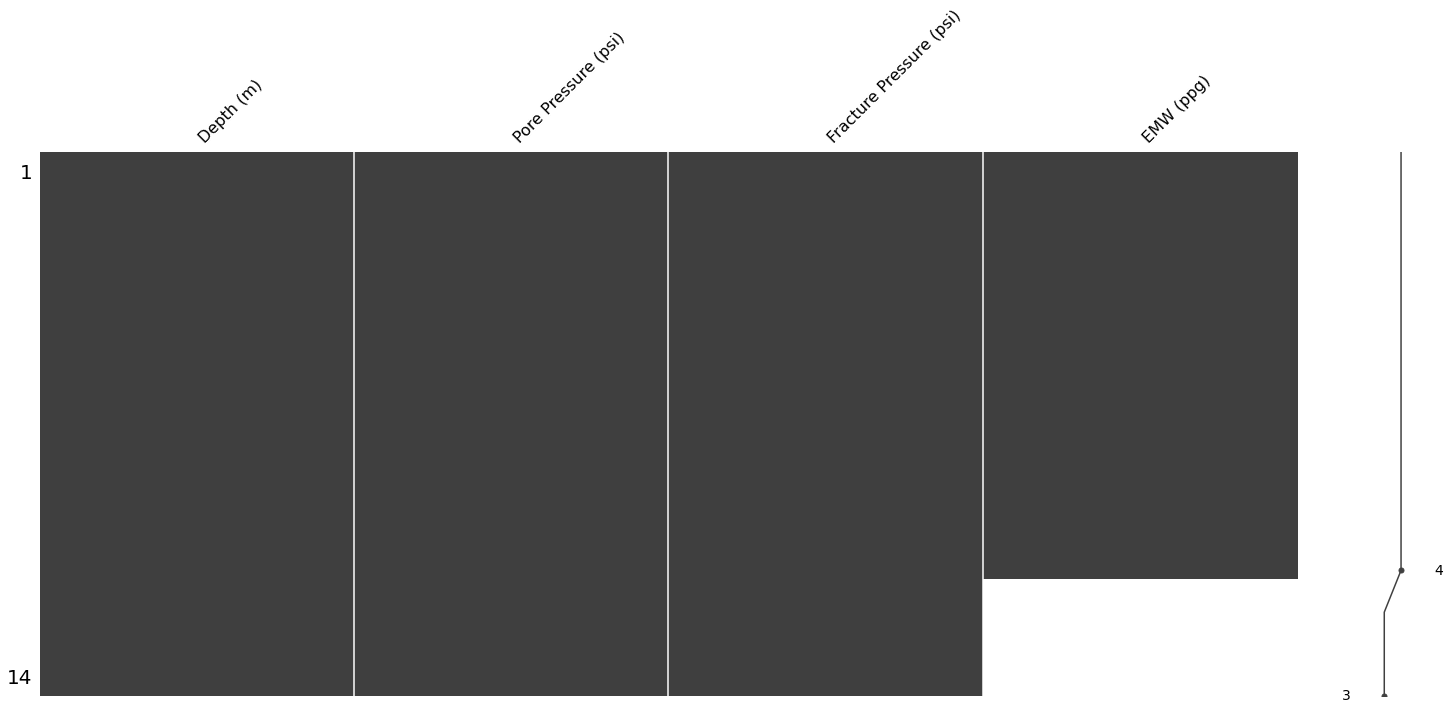

In [ ]:
print("Searching for Missing Values")
msno.matrix(Well_2_PPFG)

Extracting features from the Pore Pressure Fracture Gradient data provided

In [ ]:
Depth_2PPFGm = Well_2_PPFG['Depth (m)']
Depth_2PPFGft = Depth_2PPFGm*3.280839895  # Coverting the depth from metre to feet
Well_2_PPFG["Depth (ft)"]=Depth_2PPFGft
Well_2_PPFG.head(10)

,Depth (m),Pore Pressure (psi),Fracture Pressure (psi),EMW (ppg),Depth (ft)
0,980,1613.379,1747.131,9.95,3215.223097
1,1030,1713.267,1841.542,10.05,3379.265092
2,1080,1820.387,1934.622,10.10,3543.307087
3,1130,1918.159,2033.827,10.17,3707.349081
4,1180,2033.230,2133.885,10.25,3871.391076
5,1230,2129.876,2245.288,10.30,4035.433071
6,1280,2231.742,2347.478,10.40,4199.475066
7,1330,2325.726,2450.521,10.48,4363.517060
8,1380,2424.931,2547.355,10.58,4527.559055
9,1430,2537.187,2646.969,10.65,4691.601050


Statistical Description of the Well_2_PPFG data frame

In [ ]:
Well_2_PPFG.describe()

,Depth (m),Pore Pressure (psi),Fracture Pressure (psi),EMW (ppg),Depth (ft)
count,14.000000,14.000000,14.000000,11.000000,14.000000
mean,1305.000000,2283.776643,2403.621000,10.330000,4281.496063
std,209.165007,434.334996,435.652836,0.252547,686.236898
min,980.000000,1613.379000,1747.131000,9.950000,3215.223097
25%,1142.500000,1946.926750,2058.841500,10.135000,3748.359580
50%,1305.000000,2278.734000,2398.999500,10.300000,4281.496063
75%,1467.500000,2613.189750,2725.851000,10.530000,4814.632546
max,1630.000000,2975.463000,3106.695000,10.700000,5347.769029


In [ ]:
PoreP_2ppg = Well_2_PPFG["Pore Pressure (psi)"]/(0.052*Well_2_PPFG['Depth (ft)'])
PoreP_2ppg.head(10) 


0     9.649881
1     9.749884
2     9.879878
3     9.949879
4    10.099878
5    10.149878
6    10.219876
7    10.249874
8    10.299874
9    10.399874
dtype: float64

In [ ]:
FracP_2ppg =  Well_2_PPFG["Fracture Pressure (psi)"]/(0.052*Well_2_PPFG['Depth (ft)'])
FracP_2ppg.head(10)

0    10.449873
1    10.479873
2    10.499872
3    10.549872
4    10.599872
5    10.699872
6    10.749869
7    10.799867
8    10.819869
9    10.849868
dtype: float64

Plottting Equivalent Mud Window

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=PoreP_2ppg,
    y=Depth_2PPFGm,
    name="Pore Pressure (ppg)"      
))

fig.add_trace(go.Scatter(
    x=FracP_2ppg,
    y=Depth_2PPFGm,
    name="Fracture Pressure (ppg)",
))
fig.add_trace(go.Scatter(
    x=Well_2_PPFG['EMW (ppg)'],
    y=Depth_2PPFGm,
    name="Equivalent Mud Weight (ppg)",
))

fig['layout']['yaxis']['autorange'] = "reversed"
fig.update_layout(
    autosize=False,
    width=600,
    height=800,
    
)
fig.update_xaxes(title_text="Pressure Gradient (ppg)",showgrid = False,title_font_family="Times New Roman" )
fig.update_yaxes(title_text="Depth (m)", showgrid = False,title_font_family="Times New Roman")
fig.update_layout(title_text = "Mud Window of well 2",title_font_family = "Times New Roman",title_font_color = "Black")
fig.show()

Analysing Well Plan Data

In [ ]:
del Well_2_planD['Unnamed: 0']
Well_2_planD.head()

,"Section ("")",Top (m),Bottom (m),MW Min.(ppg),MW.1 Max.(ppg),Flow In Min.(GPM),Flow In.1 Max.(GPM)
0,12.25,1490,2350,10.4,11.1,250,550


In the mud window graph of well 2 we can observe the values of the Drilling Mud gradient is following the planed value range.

Analysing the Drilling Parameter Data

In [ ]:
del Well_2_dP['Unnamed: 0']
Well_2_dP.head(80)

,Depth (m),Hole Depth (m),Block Ht. (m),ROP (m/hr),RPM (rpm),WOB Avg (klb),Hookload (klb),Torque (f-kp),Disc (GPM),SPP (psi),Total SPM (SPM),Flow Out (%),Pit Act (bbl),Pit Chg (bbl)
0,1875.0,1875.0,21.25,45.59,146,17.3,150.6,7.44,606,1818,113,21,356,-0.9
1,1875.5,1875.5,20.75,47.61,145,17.5,150.3,7.78,604,1812,112,21,355,-1.0
2,1876.0,1876.0,20.25,43.81,146,15.9,152.0,7.21,605,1815,113,21,353,-2.0
3,1876.5,1876.5,19.75,17.18,146,5.5,163.9,8.45,601,1803,110,21,354,1.0
4,1877.0,1877.0,19.25,14.79,147,16.8,150.4,8.42,603,1809,101,20,355,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1912.5,1912.5,13.50,15.23,72,8.9,153.3,5.04,625,1875,79,13,281,0.0
76,1913.0,1913.0,13.00,10.17,71,15.0,148.5,5.35,624,1872,78,12,275,-6.0
77,1913.5,1913.5,12.50,9.30,73,3.6,159.8,4.70,587,1761,71,11,272,-3.0
78,1914.0,1914.0,12.00,8.33,73,1.8,161.3,4.72,588,1764,71,11,274,2.0


Calculating Mechanical Specific Energy of the Formation

In [ ]:
WOB_2_lbs = Well_2_dP['WOB Avg (klb)']*1000
RPM_2 = Well_2_dP['RPM (rpm)']
ROP_2_ftphr = Well_2_dP['ROP (m/hr)']*3.280839895
Tor_2_ft = Well_2_dP['Torque (f-kp)']*7.233
Sec = ((120*3.24*RPM_2*Tor_2_ft)/ROP_2_ftphr)
MSE_AB2_psi =0.35*(WOB_2_lbs + Sec)
Dep_2dPft = Well_2_dP['Depth (m)']*3.280839895
Pitch_2 = Well_2_dP['Pit Chg (bbl)']
Disc_2 = Well_2_dP['Disc (GPM)']
SPP_2 = Well_2_dP['SPP (psi)']
Well_2_dP["Mechanical Specific Energy (psi)"] = MSE_AB2_psi  # Adding Mechanical Specific Energy Feature in our Dataframe (Well_2_dP)

Doing Mud loss Check and Adding Mud Loss feature as a boolean variable in our dataframe (Well_2_dP)

In [ ]:
mask= Well_2_dP["Pit Chg (bbl)"]<0 
Well_2_dP["Minor Loss"]=mask
Well_2_dP.head(80)

,Depth (m),Hole Depth (m),Block Ht. (m),ROP (m/hr),RPM (rpm),WOB Avg (klb),Hookload (klb),Torque (f-kp),Disc (GPM),SPP (psi),Total SPM (SPM),Flow Out (%),Pit Act (bbl),Pit Chg (bbl),Mechanical Specific Energy (psi),Minor Loss
0,1875.0,1875.0,21.25,45.59,146,17.3,150.6,7.44,606,1818,113,21,356,-0.9,13202.989856,True
1,1875.5,1875.5,20.75,47.61,145,17.5,150.3,7.78,604,1812,112,21,355,-1.0,13233.486552,True
2,1876.0,1876.0,20.25,43.81,146,15.9,152.0,7.21,605,1815,113,21,353,-2.0,12773.461707,True
3,1876.5,1876.5,19.75,17.18,146,5.5,163.9,8.45,601,1803,110,21,354,1.0,23468.394467,False
4,1877.0,1877.0,19.25,14.79,147,16.8,150.4,8.42,603,1809,101,20,355,1.0,30986.662273,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1912.5,1912.5,13.50,15.23,72,8.9,153.3,5.04,625,1875,79,13,281,0.0,10263.103923,False
76,1913.0,1913.0,13.00,10.17,71,15.0,148.5,5.35,624,1872,78,12,275,-6.0,16455.181774,True
77,1913.5,1913.5,12.50,9.30,73,3.6,159.8,4.70,587,1761,71,11,272,-3.0,12327.906914,True
78,1914.0,1914.0,12.00,8.33,73,1.8,161.3,4.72,588,1764,71,11,274,2.0,13039.308623,False


Statistical Description of Well_2_dP

In [ ]:
Well_2_dP.describe()

,Depth (m),Hole Depth (m),Block Ht. (m),ROP (m/hr),RPM (rpm),WOB Avg (klb),Hookload (klb),Torque (f-kp),Disc (GPM),SPP (psi),Total SPM (SPM),Flow Out (%),Pit Act (bbl),Pit Chg (bbl),Mechanical Specific Energy (psi)
count,80.00000,80.00000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.00000,80.000000,80.000000,80.000000
mean,1894.75000,1894.75000,15.515625,24.949375,108.712500,11.662500,153.591250,6.680125,611.712500,1835.137500,89.862500,16.47500,332.637500,-1.073750,22366.271682
std,11.61895,11.61895,7.777294,20.417350,41.986494,5.327202,6.243198,1.984657,16.817105,50.451316,22.624476,4.65785,30.015711,2.809511,18673.952514
min,1875.00000,1875.00000,0.250000,1.270000,0.000000,0.000000,132.200000,0.000000,586.000000,1758.000000,27.000000,10.00000,271.000000,-10.000000,0.000000
25%,1884.87500,1884.87500,10.625000,6.787500,72.000000,7.575000,150.475000,5.570000,596.500000,1789.500000,79.000000,12.00000,309.750000,-2.000000,13030.168006
50%,1894.75000,1894.75000,15.875000,18.945000,143.500000,13.100000,152.650000,7.130000,605.500000,1816.500000,101.000000,19.50000,353.500000,-0.950000,15992.200179
75%,1904.62500,1904.62500,20.812500,40.330000,147.000000,15.900000,156.100000,8.250000,628.000000,1884.000000,111.250000,21.00000,358.000000,1.000000,23625.665304
max,1914.50000,1914.50000,30.000000,97.560000,149.000000,21.900000,187.700000,10.030000,636.000000,1908.000000,114.000000,22.00000,361.000000,4.000000,119523.284182


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=MSE_AB2_psi,
    y=Dep_2dPft,
    name="Mean Specific Energy, psi"      
))
fig['layout']['yaxis']['autorange'] = "reversed"
fig.update_layout(
    autosize=False,
    width=600,
    height=800,
    
)
fig.update_xaxes(title_text="Pressure(psi)",showgrid = False,title_font_family="Times New Roman" )
fig.update_yaxes(title_text="Depth (ft)", showgrid = False,title_font_family="Times New Roman")
fig.update_layout(title_text = "MSE curve of well 2",title_font_family = "Times New Roman",title_font_color = "Black")
fig.show()

In [ ]:
fig = make_subplots(
    rows=1, cols=4,
    subplot_titles=("ROP vs Depth", "RPM vs Depth", "WOB vs Depth", "Pit Chg vs Depth"))

fig.add_trace(go.Scatter(x=ROP_2_ftphr, y=Dep_2dPft, name="Rate of Penetration (ft/hr)"),
              row=1, col=1)

fig.add_trace(go.Scatter(x=RPM_2, y=Dep_2dPft, name="RPM"),
              row=1, col=2)

fig.add_trace(go.Scatter(x=WOB_2_lbs, y=Dep_2dPft,name="Weight on Bit (lbs)"),
              row=1, col=3)

fig.add_trace(go.Scatter(x=Pitch_2, y=Dep_2dPft,name="Pit Change (bbl)"),
              row=1, col=4)

fig.update_scenes(yaxis_autorange="reversed")
fig.update_layout(height=1000, width=2000,
                  title_text="Correlating Drilling Parameters with Mud Loss", title_font_family = "Times New Roman",title_font_color = "Black")
fig.update_yaxes(title_text="Depth (ft)", showgrid = False,title_font_family="Times New Roman")
fig.show()

In [ ]:
fig = make_subplots(
    rows=1, cols=4,
    subplot_titles=("Torque vs Depth", "Discharge vs Depth", "SPP vs Depth", "Pit Chg vs Depth"))

fig.add_trace(go.Scatter(x=Tor_2_ft, y=Dep_2dPft, name="Torque (ft-lbs)"),
              row=1, col=1)

fig.add_trace(go.Scatter(x=Disc_2, y=Dep_2dPft, name="Discharge (GPM)"),
              row=1, col=2)

fig.add_trace(go.Scatter(x=SPP_2, y=Dep_2dPft,name="Stand Pipe Pressure (psi)"),
              row=1, col=3)

fig.add_trace(go.Scatter(x=Pitch_2, y=Dep_2dPft,name="Pit Change (bbl)"),
              row=1, col=4)

fig.update_scenes(yaxis_autorange="reversed")
fig.update_layout(height=1000, width=2000,
                  title_text="Correlating Drilling Parameters with Mud Loss", title_font_family = "Times New Roman",title_font_color = "Black")
fig.update_yaxes(title_text="Depth (ft)", showgrid = False,title_font_family="Times New Roman")
fig.show()

**Well 2 Survey Data**

In [ ]:
import well_profile as wp
well = wp.load('well_2_survey.xlsx') #LOAD WELL
well.plot(style={'color': 'dls', 'size': 5}, names=['Well 2']).show()

**Well 3**

Creating Dataframes from the comma-seperated value files

In [ ]:
print("Importing Well Drilling Parameters")
Well_3_dP = pd.read_csv("Well 3 Drilling Parameters.csv")
print("Importing Well Planning Data")
Well_3_planD = pd.read_csv("Well 3 Planned Data.csv")
print("Importing Well Pore Pressure Fracture Gradient")
Well_3_PPFG = pd.read_csv("Well 3 PPFG.csv")
print("Importing Well Survey Data")
Well_3_Sur = pd.read_csv("Well 3 Survey.csv")



Importing Well Drilling Parameters
Importing Well Planning Data
Importing Well Pore Pressure Fracture Gradient
Importing Well Survey Data


In [ ]:
del Well_3_PPFG['Unnamed: 0'] #Cleaning Data 
Well_3_PPFG.head(10)

,Depth (m),Pore Pressure (psi),Fracture Pressure (psi),EMW (ppg)
0,980,1613.379,1747.131,9.85
1,1030,1713.267,1841.542,9.98
2,1080,1820.387,1934.622,10.07
3,1130,1918.159,2033.827,10.18
4,1180,2033.230,2133.885,10.30
5,1230,2129.876,2245.288,10.42
6,1280,2231.742,2347.478,10.57
7,1330,2325.726,2450.521,10.65
8,1380,2424.931,2547.355,10.73
9,1430,2537.187,2646.969,10.84


Checking fot the missing values

Searching for Missing Values


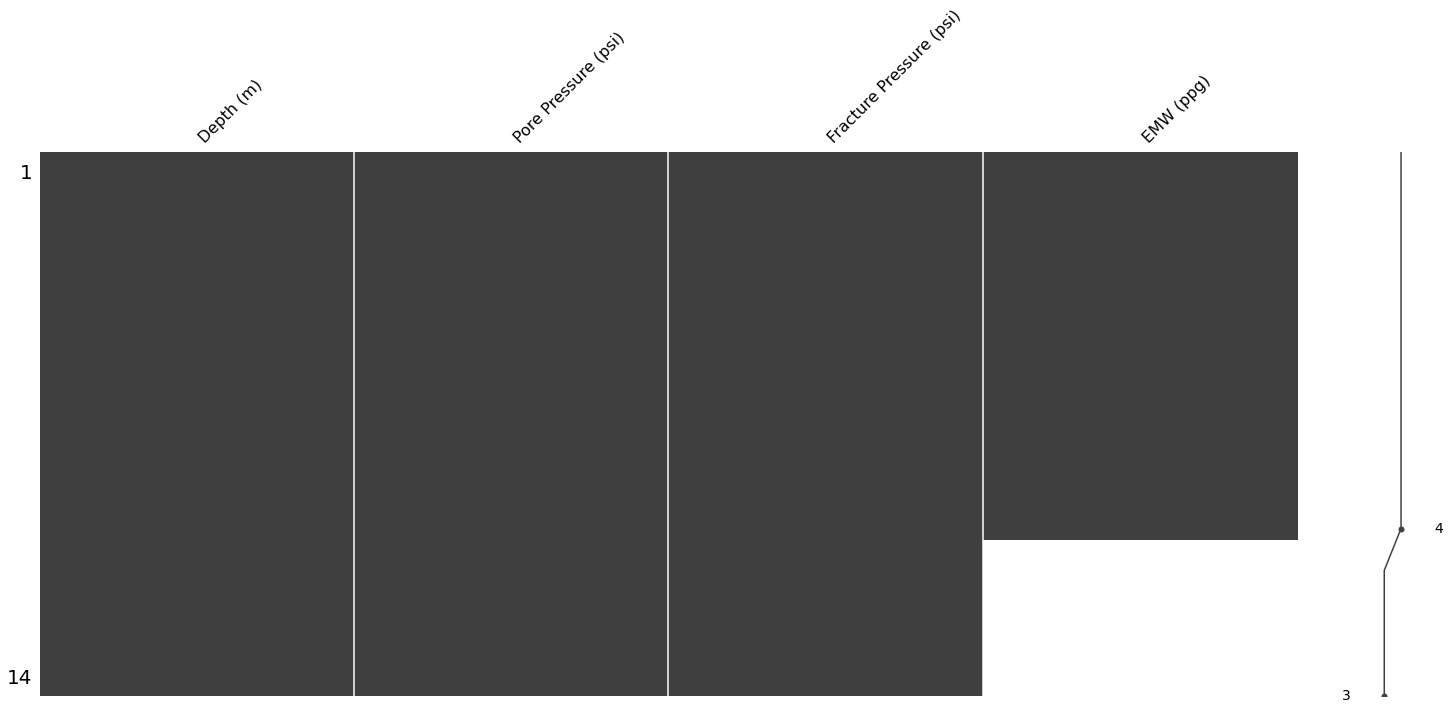

In [ ]:
print("Searching for Missing Values")
msno.matrix(Well_3_PPFG)

print("Searching for Missing Values")
msno.matrix(Well_3_PPFG)

In [ ]:
Depth_3PPFGm = Well_3_PPFG['Depth (m)']
Depth_3PPFGft = Depth_3PPFGm*3.280839895  # Coverting the depth from metre to feet
Well_3_PPFG["Depth (ft)"]=Depth_3PPFGft
Well_3_PPFG.head(10)

,Depth (m),Pore Pressure (psi),Fracture Pressure (psi),EMW (ppg),Depth (ft)
0,980,1613.379,1747.131,9.85,3215.223097
1,1030,1713.267,1841.542,9.98,3379.265092
2,1080,1820.387,1934.622,10.07,3543.307087
3,1130,1918.159,2033.827,10.18,3707.349081
4,1180,2033.230,2133.885,10.30,3871.391076
5,1230,2129.876,2245.288,10.42,4035.433071
6,1280,2231.742,2347.478,10.57,4199.475066
7,1330,2325.726,2450.521,10.65,4363.517060
8,1380,2424.931,2547.355,10.73,4527.559055
9,1430,2537.187,2646.969,10.84,4691.601050


Statistical Description of the Well_3_PPFG data frame

In [ ]:
Well_3_PPFG.describe()

,Depth (m),Pore Pressure (psi),Fracture Pressure (psi),EMW (ppg),Depth (ft)
count,14.000000,14.000000,14.000000,10.000000,14.000000
mean,1305.000000,2283.776643,2403.621000,10.359000,4281.496063
std,209.165007,434.334996,435.652836,0.337259,686.236898
min,980.000000,1613.379000,1747.131000,9.850000,3215.223097
25%,1142.500000,1946.926750,2058.841500,10.097500,3748.359580
50%,1305.000000,2278.734000,2398.999500,10.360000,4281.496063
75%,1467.500000,2613.189750,2725.851000,10.630000,4814.632546
max,1630.000000,2975.463000,3106.695000,10.840000,5347.769029


In [ ]:
PoreP_3ppg = Well_3_PPFG["Pore Pressure (psi)"]/(0.052*Well_3_PPFG['Depth (ft)'])
PoreP_3ppg.head(10) 

0     9.649881
1     9.749884
2     9.879878
3     9.949879
4    10.099878
5    10.149878
6    10.219876
7    10.249874
8    10.299874
9    10.399874
dtype: float64

In [ ]:
FracP_3ppg =  Well_3_PPFG["Fracture Pressure (psi)"]/(0.052*Well_3_PPFG['Depth (ft)'])
FracP_3ppg.head(10)

0    10.449873
1    10.479873
2    10.499872
3    10.549872
4    10.599872
5    10.699872
6    10.749869
7    10.799867
8    10.819869
9    10.849868
dtype: float64

Plottting Equivalent Mud Window

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=PoreP_3ppg,
    y=Depth_3PPFGm,
    name="Pore Pressure (ppg)"      
))

fig.add_trace(go.Scatter(
    x=FracP_3ppg,
    y=Depth_3PPFGm,
    name="Fracture Pressure (ppg)",
))
fig.add_trace(go.Scatter(
    x=Well_3_PPFG['EMW (ppg)'],
    y=Depth_3PPFGm,
    name="Equivalent Mud Weight (ppg)",
))

fig['layout']['yaxis']['autorange'] = "reversed"
fig.update_layout(
    autosize=False,
    width=600,
    height=800,
    
)
fig.update_xaxes(title_text="Pressure Gradient (ppg)",showgrid = False,title_font_family="Times New Roman" )
fig.update_yaxes(title_text="Depth (m)", showgrid = False,title_font_family="Times New Roman")
fig.update_layout(title_text = "Mud Window of well 3",title_font_family = "Times New Roman",title_font_color = "Black")
fig.show()

Analysing Well Plan Data

In [ ]:
del Well_3_planD['Unnamed: 0']
Well_3_planD.head()

,"Section ("")",Top (m),Bottom (m),MW Min.(ppg),MW.1 Max.(ppg),Flow In Min.(GPM),Flow In.1 Max(GPM)
0,12.25,1713,2555,10.3,11.1,200,500


In the mud window graph of well 3 we can observe the values of the Drilling Mud gradient is following the planed value range.

Analysing the Drilling Parameter Data

In [ ]:
del Well_3_dP['Unnamed: 0']
Well_3_dP.head()

,Date & Time,Activity,Depth (m),Hole Depth (m),Block Position (m),ROP (m/hr),RPM (rpm),WOB (klb),Hookload,Torque (f-kp),Total SPM (spm),Pump 1 Rate (spm),Pump 2 Rate (spm),Cum Strokes (cts),Discharge (GPM),SPP (psi),Flow Out (%),Pit Vol Total (bbl),Pit Vol Active (bbl),Pit Vol Chg (bbl)
0,01-01-2021 01:00,Drilling,2000.00,2000.00,16.30,21.31,145,17.4,152.5,9.66,111,56,55,13191,551,2204,25,277.0,277.0,0.5
1,01-01-2021 01:05,Drilling,2000.10,2000.10,16.19,22.35,145,20.6,149.5,7.48,111,56,55,13210,552,2209,25,273.0,273.0,-4.0
2,01-01-2021 01:10,Drilling,2000.16,2000.16,16.14,21.90,147,18.7,151.9,10.22,111,56,55,13228,551,2190,25,274.0,274.0,1.0
3,01-01-2021 01:15,Drilling,2000.20,2000.20,16.09,21.36,146,19.1,149.3,6.72,111,56,55,13246,552,2202,25,275.0,275.0,1.0
4,01-01-2021 01:20,Drilling,2000.26,2000.26,16.04,21.14,146,20.0,149.2,9.64,111,56,55,13265,553,2190,25,270.0,270.0,-5.0


Calculating Mechanical Specific Energy of the Formation

In [ ]:
WOB_3_lbs = Well_3_dP['WOB (klb)']*1000
RPM_3 = Well_3_dP['RPM (rpm)']
ROP_3_ftphr = Well_3_dP['ROP (m/hr)']*3.280839895
Tor_3_ft = Well_3_dP['Torque (f-kp)']*7.233
Sec = ((120*3.14*RPM_3*Tor_3_ft)/ROP_3_ftphr)
MSE_AB1_psi =0.35*(WOB_3_lbs + Sec)
Dep_3dPft = Well_3_dP['Depth (m)']*3.280839895
Pitch_3 = Well_3_dP['Pit Vol Chg (bbl)']
Disc_3 = Well_3_dP['Discharge (GPM)']
SPP_3 = Well_3_dP['SPP (psi)']
Well_3_dP["Mechanical Specific Energy (psi)"] = MSE_AB1_psi  # Adding Mechanical Specific Energy Feature in our Dataframe (Well_3_dP)

Doing Mud loss Check and Adding Mud Loss feature as a boolean variable in our dataframe (Well_3_dP)

In [ ]:
mask= Well_3_dP["Pit Vol Chg (bbl)"]<0 
Well_3_dP["Minor Loss"]=mask
Well_3_dP.head(80)

,Date & Time,Activity,Depth (m),Hole Depth (m),Block Position (m),ROP (m/hr),RPM (rpm),WOB (klb),Hookload,Torque (f-kp),Total SPM (spm),Pump 1 Rate (spm),Pump 2 Rate (spm),Cum Strokes (cts),Discharge (GPM),SPP (psi),Flow Out (%),Pit Vol Total (bbl),Pit Vol Active (bbl),Pit Vol Chg (bbl),Mechanical Specific Energy (psi),Minor Loss
0,01-01-2021 01:00,Drilling,2000.00,2000.00,16.30,21.31,145,17.4,152.5,9.66,111,56,55,13191,551,2204,25,277.0,277.0,0.5,25200.587798,False
1,01-01-2021 01:05,Drilling,2000.10,2000.10,16.19,22.35,145,20.6,149.5,7.48,111,56,55,13210,552,2209,25,273.0,273.0,-4.0,21319.266573,True
2,01-01-2021 01:10,Drilling,2000.16,2000.16,16.14,21.90,147,18.7,151.9,10.22,111,56,55,13228,551,2190,25,274.0,274.0,1.0,26490.112117,False
3,01-01-2021 01:15,Drilling,2000.20,2000.20,16.09,21.36,146,19.1,149.3,6.72,111,56,55,13246,552,2202,25,275.0,275.0,1.0,20039.672640,False
4,01-01-2021 01:20,Drilling,2000.26,2000.26,16.04,21.14,146,20.0,149.2,9.64,111,56,55,13265,553,2190,25,270.0,270.0,-5.0,26356.965364,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,01-01-2021 07:15,Drilling,2003.55,2003.55,12.75,23.15,146,20.4,149.5,8.33,111,56,55,14488,552,2212,25,252.0,252.0,-2.0,22414.226558,True
76,01-01-2021 07:20,Drilling,2003.58,2003.58,12.71,22.20,147,20.2,148.9,8.35,111,56,55,14506,552,2211,25,251.5,251.5,-0.5,23145.452334,True
77,01-01-2021 07:25,Drilling,2003.61,2003.61,12.68,21.34,145,16.4,152.8,8.20,111,56,55,14525,551,2211,25,251.0,251.0,-0.5,21939.432694,True
78,01-01-2021 07:30,Drilling,2003.65,2003.65,12.64,20.81,144,16.9,152.2,8.52,111,56,55,14540,552,2215,25,251.0,251.0,0.0,23056.245416,False


Statistical Description of Well_3_dP

In [ ]:
Well_3_dP.describe()

,Depth (m),Hole Depth (m),Block Position (m),ROP (m/hr),RPM (rpm),WOB (klb),Hookload,Torque (f-kp),Total SPM (spm),Pump 1 Rate (spm),Pump 2 Rate (spm),Cum Strokes (cts),Discharge (GPM),SPP (psi),Flow Out (%),Pit Vol Total (bbl),Pit Vol Active (bbl),Pit Vol Chg (bbl),Mechanical Specific Energy (psi)
count,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,3.530000e+02
mean,2007.188754,2007.188754,9.107139,15.481870,145.382436,18.801133,150.639943,7.810113,110.971671,55.966006,55.000000,16221.847025,551.518414,2206.682720,24.912181,265.865439,263.873938,-0.077904,inf
std,3.762100,3.762100,3.760106,5.772643,5.520461,2.896971,2.837946,0.693354,0.248385,0.210465,0.184637,1750.721468,1.639473,52.292134,0.413815,7.989848,9.641093,3.032779,NaN
min,2000.000000,2000.000000,3.310000,0.000000,74.000000,0.000000,144.800000,4.540000,108.000000,54.000000,54.000000,13191.000000,535.000000,1776.000000,22.000000,236.000000,236.000000,-15.000000,1.150039e+04
25%,2004.180000,2004.180000,5.720000,11.130000,145.000000,17.800000,148.800000,7.480000,111.000000,56.000000,55.000000,14706.000000,551.000000,2208.000000,25.000000,264.000000,257.000000,-2.000000,2.409426e+04
50%,2007.390000,2007.390000,8.900000,14.990000,146.000000,19.600000,149.800000,7.750000,111.000000,56.000000,55.000000,16222.000000,552.000000,2214.000000,25.000000,268.000000,265.000000,0.000000,2.901005e+04
75%,2010.570000,2010.570000,12.110000,19.040000,147.000000,20.700000,151.900000,8.180000,111.000000,56.000000,55.000000,17714.000000,552.000000,2220.000000,25.000000,271.000000,272.000000,2.000000,3.625825e+04
max,2012.980000,2012.980000,16.300000,41.220000,149.000000,24.200000,164.600000,10.230000,112.000000,57.000000,56.000000,20017.000000,558.000000,2243.000000,26.000000,280.000000,280.000000,14.000000,inf


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=MSE_AB1_psi,
    y=Dep_3dPft,
    name="Mean Specific Energy, psi"      
))
fig['layout']['yaxis']['autorange'] = "reversed"
fig.update_layout(
    autosize=False,
    width=600,
    height=800,
    
)
fig.update_xaxes(title_text="Pressure(psi)",showgrid = False,title_font_family="Times New Roman" )
fig.update_yaxes(title_text="Depth (ft)", showgrid = False,title_font_family="Times New Roman")
fig.update_layout(title_text = "MSE curve of well 3",title_font_family = "Times New Roman",title_font_color = "Black")
fig.show()

In [ ]:
fig = make_subplots(
    rows=1, cols=4,
    subplot_titles=("ROP vs Depth", "RPM vs Depth", "WOB vs Depth", "Pit Chg vs Depth"))

fig.add_trace(go.Scatter(x=ROP_3_ftphr, y=Dep_3dPft, name="Rate of Penetration (ft/hr)"),
              row=1, col=1)

fig.add_trace(go.Scatter(x=RPM_3, y=Dep_3dPft, name="RPM"),
              row=1, col=2)

fig.add_trace(go.Scatter(x=WOB_3_lbs, y=Dep_3dPft,name="Weight on Bit (lbs)"),
              row=1, col=3)

fig.add_trace(go.Scatter(x=Pitch_3, y=Dep_3dPft,name="Pit Change (bbl)"),
              row=1, col=4)

fig.update_scenes(yaxis_autorange="reversed")
fig.update_layout(height=1000, width=2000,
                  title_text="Correlating Drilling Parameters with Mud Loss", title_font_family = "Times New Roman",title_font_color = "Black")
fig.update_yaxes(title_text="Depth (ft)", showgrid = False,title_font_family="Times New Roman")
fig.show()

In [ ]:
fig = make_subplots(
    rows=1, cols=4,
    subplot_titles=("Torque vs Depth", "Discharge vs Depth", "SPP vs Depth", "Pit Chg vs Depth"))

fig.add_trace(go.Scatter(x=Tor_3_ft, y=Dep_3dPft, name="Torque (ft-lbs)"),
              row=1, col=1)

fig.add_trace(go.Scatter(x=Disc_3, y=Dep_3dPft, name="Discharge (GPM)"),
              row=1, col=2)

fig.add_trace(go.Scatter(x=SPP_3, y=Dep_3dPft,name="Stand Pipe Pressure (psi)"),
              row=1, col=3)

fig.add_trace(go.Scatter(x=Pitch_3, y=Dep_3dPft,name="Pit Change (bbl)"),
              row=1, col=4)

fig.update_scenes(yaxis_autorange="reversed")
fig.update_layout(height=1000, width=2000,
                  title_text="Correlating Drilling Parameters with Mud Loss", title_font_family = "Times New Roman",title_font_color = "Black")
fig.update_yaxes(title_text="Depth (ft)", showgrid = False,title_font_family="Times New Roman")
fig.show()

**Well 3 Survey**

In [ ]:
import well_profile as wp
well = wp.load('well_3_survey.xlsx') #LOAD WELL
well.plot(style={'color': 'dls', 'size': 5}, names=['Well 3']).show()

**Machine Learning application**

1. Decision Tree


In [ ]:
Well_3_dP.head()

,Date & Time,Activity,Depth (m),Hole Depth (m),Block Position (m),ROP (m/hr),RPM (rpm),WOB (klb),Hookload,Torque (f-kp),Total SPM (spm),Pump 1 Rate (spm),Pump 2 Rate (spm),Cum Strokes (cts),Discharge (GPM),SPP (psi),Flow Out (%),Pit Vol Total (bbl),Pit Vol Active (bbl),Pit Vol Chg (bbl),Mechanical Specific Energy (psi),Minor Loss
0,01-01-2021 01:00,Drilling,2000.00,2000.00,16.30,21.31,145,17.4,152.5,9.66,111,56,55,13191,551,2204,25,277.0,277.0,0.5,25200.587798,False
1,01-01-2021 01:05,Drilling,2000.10,2000.10,16.19,22.35,145,20.6,149.5,7.48,111,56,55,13210,552,2209,25,273.0,273.0,-4.0,21319.266573,True
2,01-01-2021 01:10,Drilling,2000.16,2000.16,16.14,21.90,147,18.7,151.9,10.22,111,56,55,13228,551,2190,25,274.0,274.0,1.0,26490.112117,False
3,01-01-2021 01:15,Drilling,2000.20,2000.20,16.09,21.36,146,19.1,149.3,6.72,111,56,55,13246,552,2202,25,275.0,275.0,1.0,20039.672640,False
4,01-01-2021 01:20,Drilling,2000.26,2000.26,16.04,21.14,146,20.0,149.2,9.64,111,56,55,13265,553,2190,25,270.0,270.0,-5.0,26356.965364,True


In [ ]:
balance_data = pd.read_csv("Global Data ML.csv")

In [ ]:
balance_data.head()

,Label,ROP (m/hr),RPM (rpm),WOB Avg (klb),Hookload (klb),Torque (f-kp),Disc (GPM),SPP,Total SPM,Flow Out (%)
0,Mud Loss,34.85,147,16.0,151.2,7.63,564,1960,113,21
1,Mud Loss,91.42,0,0.0,187.7,0.00,138,129,27,10
2,Mud Loss,1.98,81,2.2,160.3,5.10,307,851,62,12
3,Mud Loss,6.23,72,10.8,152.4,5.86,391,1011,79,12
4,Mud Loss,4.69,133,21.9,145.2,8.34,609,1827,112,21


In [ ]:
print("Dataset Length::", len(balance_data))
print("Dataset Shape::", balance_data.shape)

Dataset Length:: 58
Dataset Shape:: (58, 10)


In [ ]:
# Seperating the Target Varible

X = balance_data.values[:, 1:10]
Y = balance_data.values[:,0]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=100)
clf = DecisionTreeClassifier
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state= 100,
max_depth = 3, min_samples_leaf = 10)
clf_entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       random_state=100)

In [ ]:
# Funtion to make predictions
y_pred_en = clf_entropy.predict(X_test)
y_pred_en

array(['Mud Loss', 'No mud Loss', 'No mud Loss', 'Mud Loss',
       'No mud Loss', 'No mud Loss', 'No mud Loss', 'No mud Loss',
       'Mud Loss', 'Mud Loss', 'Mud Loss', 'No mud Loss'], dtype=object)

In [ ]:
print("Accuracy is ", accuracy_score(y_test,y_pred_en)*100)

Accuracy is  83.33333333333334


In [ ]:
df1 = pd.read_csv("Well 1 Drilling Parameters_ML.csv")

df1.head(80)

,ROP (m/hr),RPM (rpm),WOB Avg (klb),Hookload (klb),Torque (f-kp),Disc (GPM),SPP,Total SPM,Flow Out (%)
0,45.59,146,17.3,150.6,7.44,558,1961,113,25
1,47.61,145,17.5,150.3,7.78,559,1969,112,25
2,43.81,146,15.9,152.0,7.21,559,1968,113,25
3,17.18,146,5.5,163.9,8.45,544,1700,110,25
4,14.79,147,16.8,150.4,8.42,503,1679,101,25
...,...,...,...,...,...,...,...,...,...
75,15.23,72,8.9,153.3,5.04,390,1277,79,25
76,10.17,71,15.0,148.5,5.35,389,1182,78,25
77,9.30,73,3.6,159.8,4.70,352,894,71,25
78,8.33,73,1.8,161.3,4.72,353,914,71,25


In [ ]:
df2 = pd.read_csv("Well 2 Drilling Parameters_ML.csv")

df2.head(80)

,ROP (m/hr),RPM (rpm),WOB Avg (klb),Hookload (klb),Torque (f-kp),Disc (GPM),SPP (psi),Total SPM (SPM),Flow Out (%)
0,45.59,146,17.3,150.6,7.44,606,1818,113,21
1,47.61,145,17.5,150.3,7.78,604,1812,112,21
2,43.81,146,15.9,152.0,7.21,605,1815,113,21
3,17.18,146,5.5,163.9,8.45,601,1803,110,21
4,14.79,147,16.8,150.4,8.42,603,1809,101,20
...,...,...,...,...,...,...,...,...,...
75,15.23,72,8.9,153.3,5.04,625,1875,79,13
76,10.17,71,15.0,148.5,5.35,624,1872,78,12
77,9.30,73,3.6,159.8,4.70,587,1761,71,11
78,8.33,73,1.8,161.3,4.72,588,1764,71,11


In [ ]:
df3 = pd.read_csv("Well 3 Drilling Parameters_ML.csv")

df3.head(80)

,ROP (m/hr),RPM (rpm),WOB (klb),Hookload,Torque (f-kp),Discharge (GPM),SPP (psi),Total SPM (spm),Flow Out (%)
0,21.31,145,17.4,152.5,9.66,551,2204,111,25
1,22.35,145,20.6,149.5,7.48,552,2209,111,25
2,21.90,147,18.7,151.9,10.22,551,2190,111,25
3,21.36,146,19.1,149.3,6.72,552,2202,111,25
4,21.14,146,20.0,149.2,9.64,553,2190,111,25
...,...,...,...,...,...,...,...,...,...
75,23.15,146,20.4,149.5,8.33,552,2212,111,25
76,22.20,147,20.2,148.9,8.35,552,2211,111,25
77,21.34,145,16.4,152.8,8.20,551,2211,111,25
78,20.81,144,16.9,152.2,8.52,552,2215,111,25


In [ ]:
y_pred_1 = clf_entropy.predict(df1)
y_pred_1

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names



array(['No mud Loss', 'No mud Loss', 'Mud Loss', 'Mud Loss',
       'No mud Loss', 'Mud Loss', 'No mud Loss', 'No mud Loss',
       'Mud Loss', 'Mud Loss', 'No mud Loss', 'Mud Loss', 'Mud Loss',
       'No mud Loss', 'No mud Loss', 'Mud Loss', 'Mud Loss', 'Mud Loss',
       'Mud Loss', 'Mud Loss', 'Mud Loss', 'No mud Loss', 'Mud Loss',
       'Mud Loss', 'Mud Loss', 'Mud Loss', 'Mud Loss', 'Mud Loss',
       'Mud Loss', 'Mud Loss', 'Mud Loss', 'Mud Loss', 'Mud Loss',
       'Mud Loss', 'Mud Loss', 'Mud Loss', 'Mud Loss', 'No mud Loss',
       'Mud Loss', 'Mud Loss', 'Mud Loss', 'Mud Loss', 'No mud Loss',
       'Mud Loss', 'Mud Loss', 'Mud Loss', 'Mud Loss', 'Mud Loss',
       'Mud Loss', 'Mud Loss', 'Mud Loss', 'Mud Loss', 'Mud Loss',
       'Mud Loss', 'Mud Loss', 'Mud Loss', 'Mud Loss', 'Mud Loss',
       'Mud Loss', 'Mud Loss', 'Mud Loss', 'Mud Loss', 'Mud Loss',
       'Mud Loss', 'Mud Loss', 'Mud Loss', 'Mud Loss', 'Mud Loss',
       'Mud Loss', 'Mud Loss', 'Mud Loss', 'Mud Loss'

In [ ]:
y_pred_2 = clf_entropy.predict(df2)
y_pred_2

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names



array(['No mud Loss', 'No mud Loss', 'Mud Loss', 'Mud Loss',
       'No mud Loss', 'Mud Loss', 'No mud Loss', 'No mud Loss',
       'Mud Loss', 'Mud Loss', 'No mud Loss', 'Mud Loss', 'Mud Loss',
       'No mud Loss', 'No mud Loss', 'Mud Loss', 'Mud Loss', 'Mud Loss',
       'Mud Loss', 'Mud Loss', 'Mud Loss', 'No mud Loss', 'Mud Loss',
       'Mud Loss', 'Mud Loss', 'Mud Loss', 'Mud Loss', 'Mud Loss',
       'Mud Loss', 'Mud Loss', 'Mud Loss', 'Mud Loss', 'Mud Loss',
       'Mud Loss', 'Mud Loss', 'Mud Loss', 'Mud Loss', 'No mud Loss',
       'Mud Loss', 'Mud Loss', 'Mud Loss', 'Mud Loss', 'No mud Loss',
       'Mud Loss', 'Mud Loss', 'Mud Loss', 'Mud Loss', 'Mud Loss',
       'Mud Loss', 'Mud Loss', 'Mud Loss', 'Mud Loss', 'Mud Loss',
       'Mud Loss', 'Mud Loss', 'Mud Loss', 'Mud Loss', 'Mud Loss',
       'Mud Loss', 'Mud Loss', 'Mud Loss', 'Mud Loss', 'Mud Loss',
       'Mud Loss', 'Mud Loss', 'Mud Loss', 'Mud Loss', 'Mud Loss',
       'Mud Loss', 'Mud Loss', 'Mud Loss', 'Mud Loss'

In [ ]:
y_pred_3 = clf_entropy.predict(df3)
y_pred_3

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names



array(['No mud Loss', 'No mud Loss', 'No mud Loss', 'No mud Loss',
       'No mud Loss', 'No mud Loss', 'No mud Loss', 'No mud Loss',
       'No mud Loss', 'No mud Loss', 'No mud Loss', 'No mud Loss',
       'No mud Loss', 'No mud Loss', 'No mud Loss', 'No mud Loss',
       'No mud Loss', 'No mud Loss', 'No mud Loss', 'No mud Loss',
       'No mud Loss', 'No mud Loss', 'No mud Loss', 'Mud Loss',
       'Mud Loss', 'No mud Loss', 'No mud Loss', 'No mud Loss',
       'No mud Loss', 'No mud Loss', 'No mud Loss', 'No mud Loss',
       'No mud Loss', 'No mud Loss', 'No mud Loss', 'No mud Loss',
       'No mud Loss', 'No mud Loss', 'No mud Loss', 'No mud Loss',
       'No mud Loss', 'No mud Loss', 'No mud Loss', 'No mud Loss',
       'No mud Loss', 'No mud Loss', 'No mud Loss', 'No mud Loss',
       'No mud Loss', 'No mud Loss', 'No mud Loss', 'No mud Loss',
       'No mud Loss', 'No mud Loss', 'No mud Loss', 'Mud Loss',
       'Mud Loss', 'Mud Loss', 'No mud Loss', 'No mud Loss',
       'No

In [ ]:
Well_1_dP["ML Prediction"]= y_pred_1
Well_2_dP["ML Prediction"]= y_pred_2
Well_3_dP["ML Prediction"]= y_pred_3

In [ ]:
Well_1_dP.head()

,Depth (m),Hole Depth (m),Block Ht. (m),ROP (m/hr),RPM (rpm),WOB Avg (klb),Hookload (klb),Torque (f-kp),Disc (GPM),SPP,Total SPM,Flow Out (%),Pit Act (bbl),Pit Chg (bbl),Mechanical Specific Energy (psi),Minor Loss,ML Prediction
0,1820.0,1820.0,21.25,45.59,146,17.3,150.6,7.44,558,1961,113,21,301,-0.9,12982.372885,True,No mud Loss
1,1820.5,1820.5,20.75,47.61,145,17.5,150.3,7.78,559,1969,112,21,300,-1.0,13014.088818,True,No mud Loss
2,1821.0,1821.0,20.25,43.81,146,15.9,152.0,7.21,559,1968,113,21,298,-2.0,12550.978321,True,Mud Loss
3,1821.5,1821.5,19.75,17.18,146,5.5,163.9,8.45,544,1700,110,21,299,1.0,22803.474885,False,Mud Loss
4,1822.0,1822.0,19.25,14.79,147,16.8,150.4,8.42,503,1679,101,20,301,2.0,30211.765289,False,No mud Loss


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=y_pred_1,
    y=Dep_1dPft,
    name="Machine Learning Prediction"      
))

fig.add_trace(go.Scatter(
    x=Well_1_dP['Minor Loss'],
    y=Dep_1dPft,
    name="Pit loss",
))

fig['layout']['yaxis']['autorange'] = "reversed"
fig.update_layout(
    autosize=False,
    width=600,
    height=800,
    
)
fig.update_xaxes(title_text="Predictions",showgrid = False,title_font_family="Times New Roman" )
fig.update_yaxes(title_text="Depth (ft)", showgrid = False,title_font_family="Times New Roman")
fig.update_layout(title_text = "Loss analysis Well 1 ",title_font_family = "Times New Roman",title_font_color = "Black")
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=y_pred_2,
    y=Dep_2dPft,
    name="Machine Learning Prediction"      
))

fig.add_trace(go.Scatter(
    x=Well_2_dP['Minor Loss'],
    y=Dep_2dPft,
    name="Pit loss",
))

fig['layout']['yaxis']['autorange'] = "reversed"
fig.update_layout(
    autosize=False,
    width=600,
    height=800,
    
)
fig.update_xaxes(title_text="Predictions",showgrid = False,title_font_family="Times New Roman" )
fig.update_yaxes(title_text="Depth (ft)", showgrid = False,title_font_family="Times New Roman")
fig.update_layout(title_text = "Loss analysis Well 2 ",title_font_family = "Times New Roman",title_font_color = "Black")
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=y_pred_2,
    y=Dep_2dPft,
    name="Machine Learning Prediction"      
))

fig.add_trace(go.Scatter(
    x=Well_2_dP['Minor Loss'],
    y=Dep_2dPft,
    name="Pit loss",
))

fig['layout']['yaxis']['autorange'] = "reversed"
fig.update_layout(
    autosize=False,
    width=600,
    height=800,
    
)
fig.update_xaxes(title_text="Predictions",showgrid = False,title_font_family="Times New Roman" )
fig.update_yaxes(title_text="Depth (ft)", showgrid = False,title_font_family="Times New Roman")
fig.update_layout(title_text = "Loss analysis Well 3 ",title_font_family = "Times New Roman",title_font_color = "Black")
fig.show()

In [ ]:
from google.colab import files

Well_1_dP.to_csv('Sol_Well_1_dP.csv')
files.download('Sol_Well_1_dP.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

Well_2_dP.to_csv('Sol_Well_2_dP.csv')
files.download('Sol_Well_2_dP.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

Well_3_dP.to_csv('Sol_Well_3_dP.csv')
files.download('Sol_Well_3_dP.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Building Neural Network to Deal with Time loss**

In [ ]:
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

In [ ]:
def read_dataset():
  df = pd.read_csv("Global Data ML.csv")
  print(len(df.columns))
  X = df[df.columns[1:9]].values
  y = df[df.columns[0]]
  # Encoding Dependent Variables
  encoder = LabelEncoder()
  encoder.fit(y)
  y = encoder.transform(y)
  Y = one_hot_encode(y)
  print(X.shape)
  return(X, Y)


In [ ]:
# Define the encoder function
def one_hot_encode(labels):
  n_labels = len(labels)
  n_unique_labels = len(np.unique(labels))
  one_hot_encode = np.zeros((n_labels, n_unique_labels))
  one_hot_encode[np.arange(n_labels), labels] = 1
  return one_hot_encode

In [ ]:
#Read the data set
X, Y = read_dataset()

10
(58, 8)


In [ ]:
#Shuffle the dataset to mix up the rows
X, Y = shuffle(X, Y, random_state = 1)

In [ ]:
#Convert the dataset into train and test part
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.20, random_state =415)

In [ ]:
#Inspecting the train and testing dataset
print(train_x.shape)
print(train_x.shape)
print(test_x.shape)

(46, 8)
(46, 8)
(12, 8)


In [ ]:
#Define tthe important parameter and variables
learning_rate = 0.3
training_epochs = 1000
cost_history = np.empty(shape=[1], dtype=float)
n_dim = X.shape[1]
print("ndim", n_dim)
n_class = 2
model_path = "https://drive.google.com/drive/folders/19LbvgV26SFqORGJGgaOPb9qhpJvHjH8h?usp=sharing"

ndim 8


In [ ]:
#Define the numbers of hidden layer
n_hidden_1 = 20
n_hidden_2 = 20
n_hidden_3 = 20
n_hidden_4 = 20

x = tf.compat.v1.placeholder(tf.float32, [None, n_dim])
W = tf.compat.v1.get_variable(tf.zeros([8,2]))
b = tf.compat.v1.get_variable(tf.zeros([2]))
y_ = tf.compat.v1.placeholder(tf.float32, [None, n_class])

RuntimeError: ignored

Due to function changes in the tensorflow libraby model cannot get trained in provided time